This notebook shuffles into the center of a Lorenz 63 disc and back out.
Measures a sensitivity to noise

In [1]:
import cactis
from cactis.Data import load_lorenz63
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import gudhi as gd

In [2]:
from cactis import Trajectory
l63 = load_lorenz63() 
traj63 = Trajectory(l63[:,0:1000])
bins63 = traj63.set_bins(15)
binseq63 = traj63.bin_sequence()
A63, verts63, counts63 = traj63.adjacency()

In [3]:
import plotly.graph_objects as go
import numpy as np

points_before_break = 400
points_after_break = 600
last_pt = l63[:,points_before_break-1]
skip_length = 50
next_pt = l63[:,points_before_break+skip_length]
center_pt = [-10,-10,26]
number_connecting1 = 100
number_connecting2 = number_connecting1
connecting_sequence1 = np.linspace(last_pt,center_pt,num=number_connecting1)
connecting_sequence2 = np.linspace(center_pt, next_pt, num=number_connecting2)

data = np.concat([l63[:,0:points_before_break].T, connecting_sequence1, connecting_sequence2, l63[:,points_before_break+skip_length:skip_length+points_after_break].T]).T
total_points = data.shape[1]

fig = go.Figure(data=[go.Scatter3d( x=data[0,:],
                                    y=data[1,:],
                                    z=data[2,:],
                                   mode='markers',
                                   marker=dict(
                                    size=3,
                                    color=np.linspace(0,total_points,total_points),                # set color to an array/list of desired values
                                    colorscale='Viridis',   # choose a colorscale
                                    opacity=0.8)
)
    ])
fig.show()

In [4]:

binloc63 = traj63.bin_centers()

In [6]:
from cactis import Digraph
G63 = Digraph(A63, verts63, counts63, loops = False)
from cactis.viz import graph_graph
fig = graph_graph(G63, traj63.bin_centers(), arrows=True)
fig.show()

/home/benja/cactis/.venv/lib/python3.12/site-packages/gudhi/persistence_graphical_tools.py:129: UserWarning:

usetex mode requires TeX.



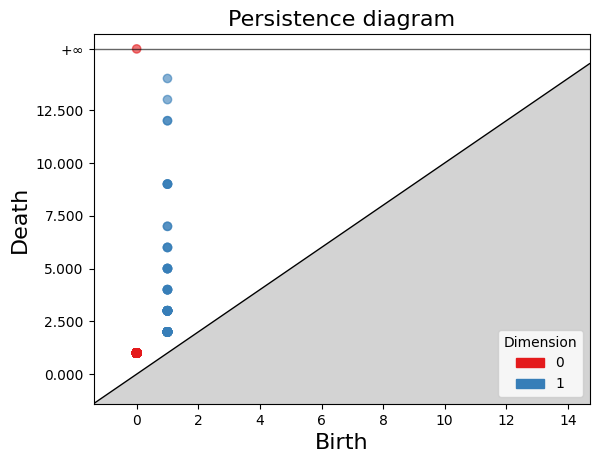

In [7]:
D63 = G63.distance_matrix()
from cactis import DowkerComplex
MNeighbor = DowkerComplex(D63).create_simplex_tree(filtration='Sublevel', max_dimension=2)
dgms = MNeighbor.persistence() #this is the gudhi built in persistence function
gd.plot_persistence_diagram(dgms)
plt.show()

In [8]:
traj_perturbed = Trajectory(data)
bins_pert = traj_perturbed.set_bins(15)
binseq_pert = traj_perturbed.bin_sequence()
A_p, verts_p, counts_p = traj_perturbed.adjacency()
binloc_p = traj63.bin_centers()

G_p = Digraph(A_p, verts_p, counts_p, loops = False)
fig = graph_graph(G_p, traj_perturbed.bin_centers(), arrows=True)
fig.show()

In [9]:
D_p = G_p.distance_matrix()
MNeighbor = DowkerComplex(D_p).create_simplex_tree(filtration='Sublevel', max_dimension=2)
dgms_p = MNeighbor.persistence() #this is the gudhi built in persistence function
# gd.plot_persistence_diagram(dgms_p)
# plt.show()

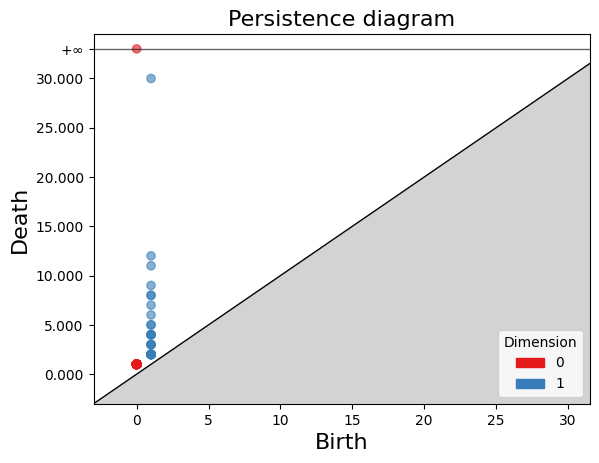

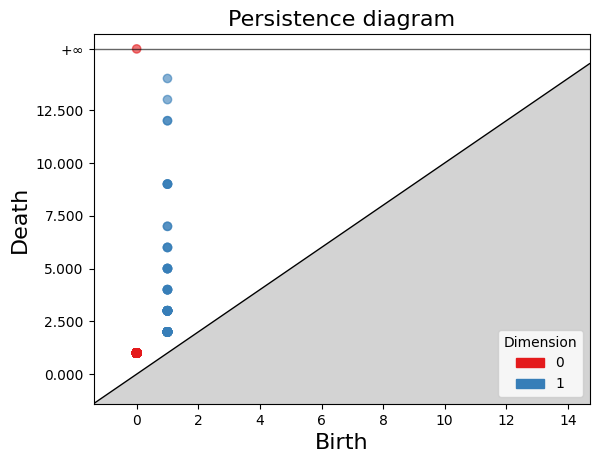

In [10]:
gd.plot_persistence_diagram(dgms_p)
plt.show()
gd.plot_persistence_diagram(dgms)
plt.show()

In [11]:
# print(dgms)
# print(dgms_p)
diff = set(dgms).symmetric_difference(set(dgms_p))
for d in diff:
    print(d)

(1, (1.0, 8.0))
(1, (1.0, 30.0))
(1, (1.0, 14.0))
(1, (1.0, 13.0))
(1, (1.0, 11.0))


In [12]:
from gudhi import bottleneck_distance
dgms1 = [pt[1] for pt in dgms if pt[0] == 1]
dgms_p1 = [pt[1] for pt in dgms_p if pt[0] == 1]
bottleneck_dist = bottleneck_distance(dgms1, dgms_p1)
print("Bottleneck distance between original and perturbed:", bottleneck_dist)

Bottleneck distance between original and perturbed: 14.5
